In [30]:
import matplotlib.pyplot as plt
from cycler import cycler
import sci_mplstyle_package
from matplotlib.ticker import MaxNLocator


# Font properties
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

# plt.rcParams['text.usetex'] = False  # Do not use LaTeX for text rendering
# plt.rcParams['font.family'] = 'serif'  # Set the font family to serif
# plt.rcParams['font.serif'] = ['Palatino Linotype', 'DejaVu Serif']  # Use Palatino, fallback to DejaVu Serif
# plt.rcParams['mathtext.fontset'] = 'custom'  # Use custom fonts for mathtext
# plt.rcParams['mathtext.rm'] = 'Palatino Linotype'  # Roman (non-italic) font


# # Use LaTeX for math formatting
plt.rcParams['text.usetex'] = False
plt.rcParams['font.serif'] = ['cmr10', 'Computer Modern Serif', 'DejaVu Serif']
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['mathtext.fontset'] = 'cm'

# Figure properties
# plt.rcParams['figure.edgecolor'] = 'black'
# plt.rcParams['figure.facecolor'] = 'white'
# plt.rcParams['figure.dpi'] = 300

# # Axes properties
plt.rcParams['axes.facecolor'] = '#eaeaf2' #[0.95, 0.95, 0.95]
# plt.rcParams['axes.linewidth'] = 0.5
# plt.rcParams['axes.spines.right'] = True
# plt.rcParams['axes.spines.top'] = False
# plt.rcParams['axes.xmargin'] = 0.05
# plt.rcParams['axes.ymargin'] = 0.05
# = cycler
# plt.cycler("color", plt.cm.tab20c.colors)

# ax.set_prop_cycle(color=[
#     '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
#     '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
#     '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
#     '#17becf', '#9edae5'])

# plt.rcParams['axes.prop_cycle']   = cycler('color', ['#e66101', '#5e3c99', '#fdb863'])
#  '#aec7e8',

clr = ['#1f77b4', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5']
plt.rcParams['axes.prop_cycle']   = cycler('color', clr)


# Line properties
# plt.rcParams['lines.linewidth'] = 1.0
# plt.rcParams['lines.markersize'] = 1.0

# Legend properties
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.fancybox'] = True
plt.rcParams['legend.framealpha'] = 0.85
# plt.rcParams['legend.numpoints'] = 1

# Grid properties
# plt.rcParams['axes.grid'] = True
# plt.rcParams['grid.color'] = [1, 1, 1]
# plt.rcParams['grid.linewidth'] = 1.0
# plt.rcParams['grid.alpha'] = 1.0
# plt.rcParams['axes.axisbelow'] = True

# Tick properties (X-axis)
# plt.rcParams['xtick.color'] = 'black'
# plt.rcParams['xtick.direction'] = 'out'
# plt.rcParams['xtick.minor.visible'] = True
# plt.rcParams['xtick.minor.size'] = 3.0
# plt.rcParams['xtick.minor.width'] = 0.75
# plt.rcParams['xtick.major.size'] = 6.0
# plt.rcParams['xtick.major.width'] = 0.5

# Tick properties (Y-axis)
# plt.rcParams['ytick.color'] = 'black'
# plt.rcParams['ytick.direction'] = 'out'
# plt.rcParams['ytick.labelleft'] = True
# plt.rcParams['ytick.major.size'] = 6.0
# plt.rcParams['ytick.major.width'] = 0.95
# plt.rcParams['ytick.minor.size'] = 3.0
# plt.rcParams['ytick.minor.visible'] = False
# plt.rcParams['ytick.minor.width'] = 0.5

# # Savefig properties
# plt.rcParams['savefig.bbox'] = 'tight'
# plt.rcParams['savefig.pad_inches'] = 0.01



### Load Modules

In [2]:
# Restart the kernel
import os
import dill as pickle
notebook_dir = os.getcwd()
os.chdir(r"C:\Users\suparnob\OneDrive - Texas A&M University\Academic\TAMU_MATERIALS\POSTDOC\HYPERREDUCTION\SUPARNO\HYPERREDUCTION__TAMIDS\pyHyperRom")

In [3]:
working_dir = os.getcwd()
folder = "linear"
# folder ="nonlinear" # make sure to change the thermal properties 

In [4]:

# Basic and Utility Imports from Local Modules
from src.codes.basic import *
from src.codes.utils.fem_utils_HC import *
# from src.codes.utils.plot_files.plot_utils import OneDPlot as plot
from src.codes.utils.rom_utils import *

# from src.codes.utils.plot_utils import data_stats

# # Problem Classes for Heat Conduction
if folder=="linear":
    from src.codes.prob_classes.heat_conduction.base_class_heat_conduction import ROM_simulation_affine
else:
    from src.codes.prob_classes.heat_conduction.base_class_heat_conduction import ROM_simulation
# os.chdir(current_dir)

# # Reduced Order Modeling (ROM) Classes
import src.codes.reductor.rom_class_ms as rom_class

# Algorithms for ECSW Model Reduction
from src.codes.algorithms.ecsw import ecsw_red

# Third-Party Libraries for Data Handling and Visualization
import ptitprince as pt
import pandas as pd
import time as time

### Epistemic Uncertainty[Number of snapshots]

In [5]:
Model_error = []
Model_ROM_error = []

In [6]:
# q_param = (-50, 50) # For F
# k_param = (-4, 4) # For K
# param_ranges = [k_param, q_param]
# method = 'sobol'

q_param = (-1000, 1000) # For F
k_param = (-4, 4) # For K
param_ranges = [k_param, q_param]
method = 'sobol'

In [7]:
p = 4
N_snap=2**p
print(N_snap)

16


### Generate Training datasets using different distribution

In [8]:
import numpy as np
from examples.heat_conduction.OneD_heat_conduction.FEM_1D_data_gen_paper import data_gen

In [9]:
# data_gen??

In [10]:
# from src.codes.prob_classes.structural_mechanics.base_class_struc_mech_NL_static_axial import ROM_simulation_UQ

# Step 2: Modify the parameter
# Specify mean and standard deviation

# generate = True
# filename_dataC = f'data/DataClass_NL_Final_new_{N_snap}_{method}.dill'
filename_dataC = f'data/DataClass_{folder}_Final_new_{N_snap}_{method}_eL.dill'


if os.path.exists(notebook_dir+'/'+filename_dataC):

    generate = False

    with open(notebook_dir+'/'+filename_dataC, 'rb') as f:
        Data_cls = pickle.load(f)
    

else:
# generate = True
# params = generate_sobol(len(param_ranges), N_snap, param_ranges)
# print(params)


    generate = True
    params_train = generate_sobol(len(param_ranges), N_snap, param_ranges)
    params_test = generate_sobol(len(param_ranges), N_snap, param_ranges)

    params = np.append(params_train,params_test,axis=0)

    train_mask = np.ones(len(params),dtype=bool)
    train_mask[len(params_train):] = False
    # train_mask = bool(train_mask)


    test_mask = np.zeros(len(params),dtype=bool)
    test_mask[len(params_test):] = True

    print(params)


In [11]:
# # Legend properties
# plt.rcParams['legend.frameon'] = True
# plt.rcParams['legend.fancybox'] = True
# plt.rcParams['legend.framealpha'] = 1.0

# fig,ax= plt.subplots()
# ax.scatter(params[train_mask,0],params[train_mask,1],color='k')
# ax.scatter(params[test_mask,0],params[test_mask,1],color='white',edgecolors='k')
# plt.xlabel('$\mu$')
# plt.ylabel('$\\beta$')
# plt.legend(['Training','Testing'])
# plt.savefig(notebook_dir+"/param_list.pdf",format = "pdf")

In [12]:
if(generate):

    tic = time.perf_counter()
    if folder=="linear":
        Data_cls = data_gen(params,notebook_dir+'/'+filename_dataC,affine=True,train_mask=train_mask,test_mask=test_mask)
    else:
        Data_cls = data_gen(params, notebook_dir+'/'+filename_dataC, train_mask=train_mask,test_mask=test_mask)

    toc = time.perf_counter()
    fom_time = toc-tic


In [13]:
# load required variables from data
FOS = Data_cls.FOS
d = FOS.data
mask = d.mask

param_list = np.asarray(Data_cls.param_list)

NLS = np.asarray(Data_cls.NL_solutions)

K_mus = Data_cls.K_mus
q_mus = Data_cls.q_mus

# NLS_train = NLS[:,d.mask]

train_mask, test_mask = Data_cls.train_mask, Data_cls.test_mask 
NLS_train = NLS[train_mask][:,d.mask]
NLS_test = NLS[test_mask][:,d.mask]


N_snap,_ = np.shape(NLS)
print(N_snap)

32


In [14]:
os.chdir(working_dir)

### Mean Subtraction

In [15]:
NLS_train_mean = np.mean(NLS_train,axis = 0)
NLS_train_ms = NLS_train - NLS_train_mean

### Plot snapshots

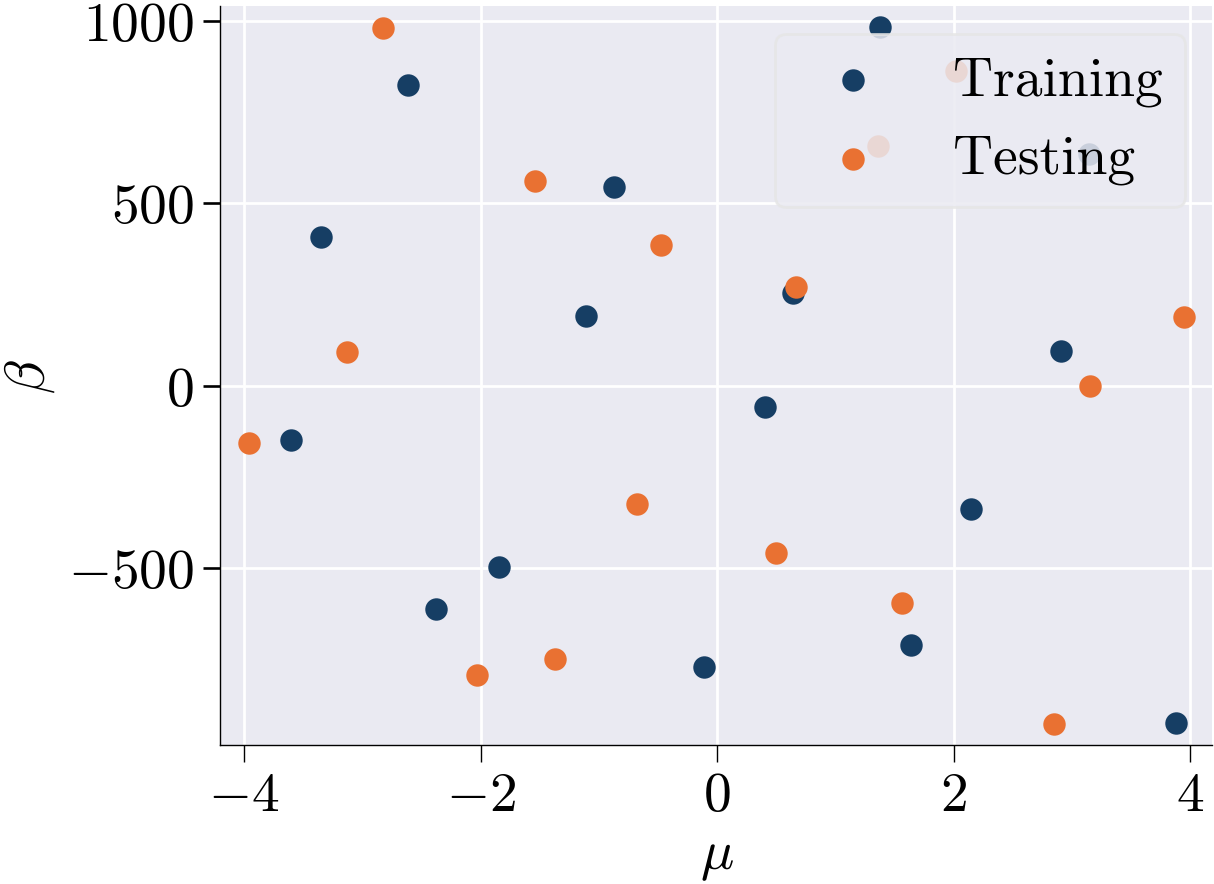

In [32]:
plt.scatter(param_list[:16][:,0],param_list[:16][:,1],s=50,c='#163e64',label="Training")
plt.scatter(param_list[16:][:,0],param_list[16:][:,1],s=50,c='#e97132',label="Testing")
plt.xlabel("$\mu$")
plt.ylabel("$\\beta$")
plt.legend()
plt.savefig(notebook_dir+"param_list_L.pdf",dpi=300)

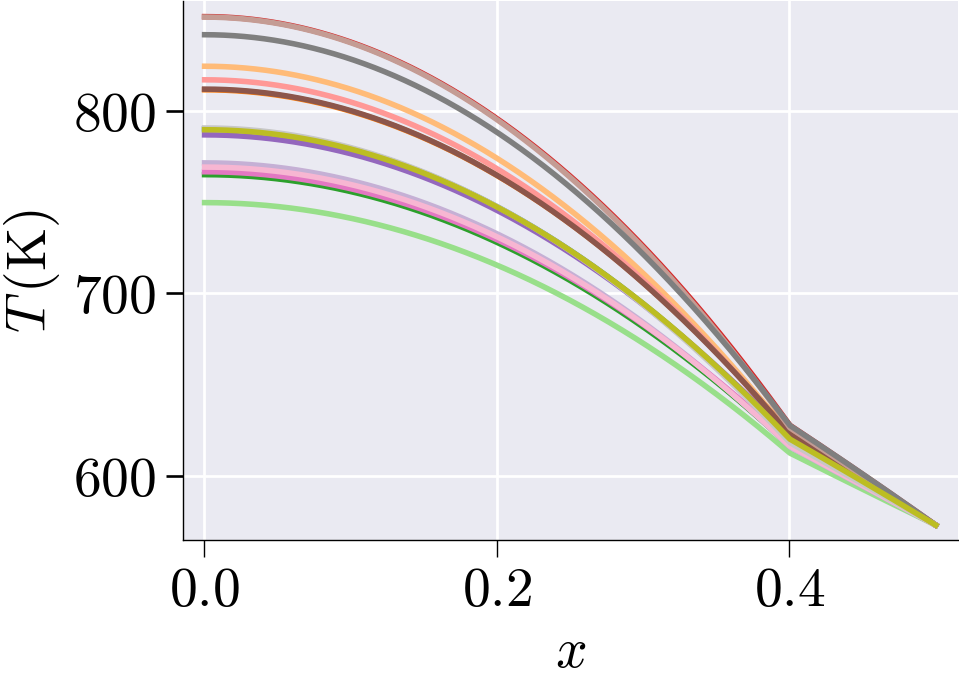

In [22]:
fig, ax = plt.subplots(figsize=(5,3.5))
plt.rcParams['axes.prop_cycle'] = plt.cycler("color", clr)

for i in range(len(NLS_train_ms)):
    # ax.plot(d.xi[0][1:], NLS_train_ms[i])
    ax.plot(d.xi[0][1:], NLS_train[i])
    # Plot = plot(d.xi[0][1:], NLS_train_ms[i], ax=ax)
    plt.rcParams['figure.dpi'] = 200
    # Plot.line_()
if folder=="linear":
    plt.ylabel('$T\,$(K)')
    
plt.xlabel('$x$')
plt.savefig(notebook_dir+f"/New_{folder}/{folder}_T_FOM.pdf",format="pdf",dpi=300)


#### Step 1: Perform SVD on the snapshots (calculate $\mathbb{V}(=\mathbb{W}$)):

Number of modes selected: 3


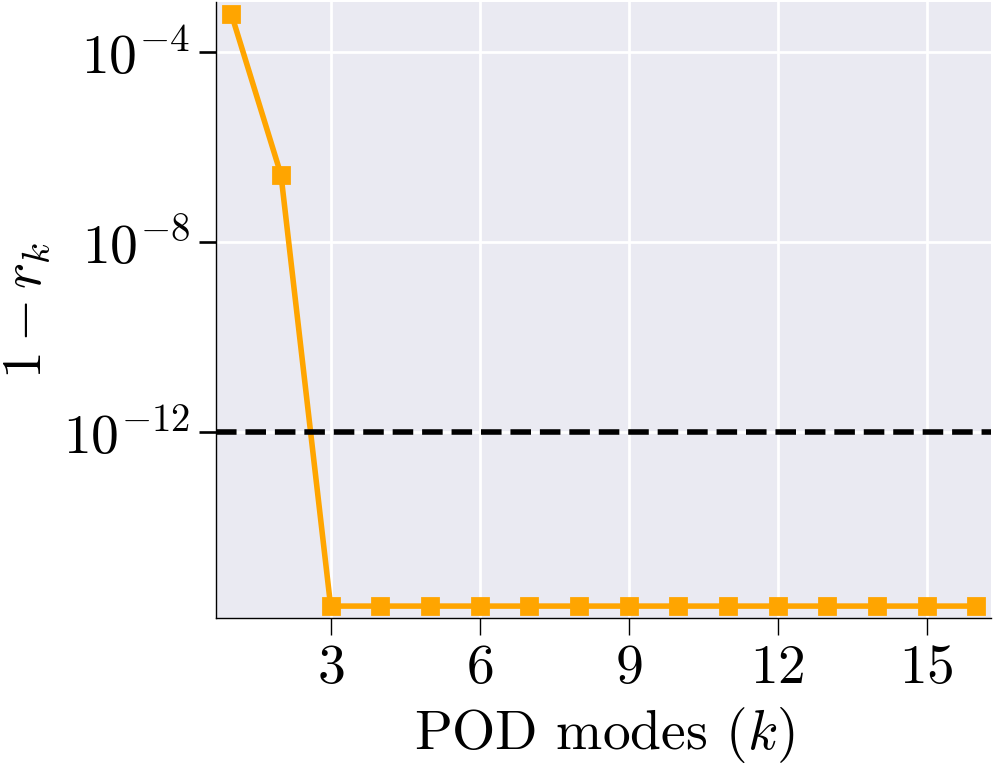

In [23]:
# fig, ax = plt.subplots(figsize=(5,3.5))
# plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.markersize'] = 6
plt.rcParams['lines.linewidth'] = 2.0

n_sel, U = svd_mode_selector(NLS_train_ms, tolerance=1e-12,modes=True)
V_sel = U[:, :n_sel]
if folder=="linear":
    plt.ylabel('$1-r_{k}$')

plt.xlabel('POD modes ($k$)')
plt.savefig(notebook_dir+f"/New_{folder}/{folder}_Mode_selection.pdf", format="pdf",dpi=300)

In [18]:
V_sel.shape

(5000, 3)

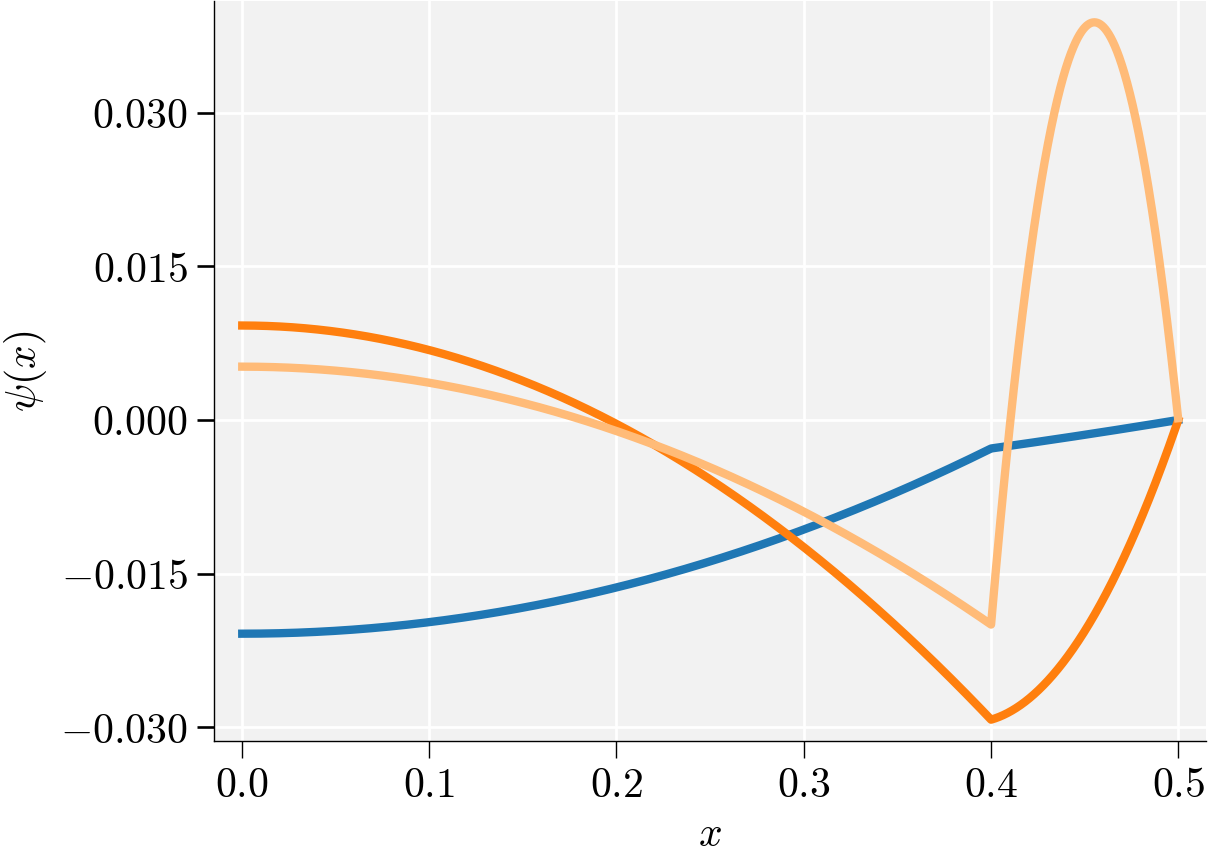

In [20]:
fig, ax = plt.subplots()
plt.rcParams['axes.prop_cycle'] = plt.cycler("color", clr)

# plt.rcParams['font.size'] = 40
# plt.rcParams['axes.labelsize'] = 20
# plt.rcParams['axes.titlesize'] = 20
# plt.rcParams['legend.fontsize'] = 20
# font = {'weight' : 'bold',
#         'size'   : 55}

# matplotlib.rc('font', **font)

# plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.magma(np.linspace(0,1,n_sel+6)))


for i in range(n_sel):
    # Plot = plot(d.xi[0][1:], V_sel[:,i], ax=ax)
    # Plot.line_()
    plt.plot(d.xi[0][1:], V_sel[:,i],lw=3)

ax.set_xlabel('$x$')
if folder=="linear":
    ax.set_ylabel('$\psi(x)$')
    
ax.yaxis.set_major_locator(MaxNLocator(nbins=5)) 
# plt.show()
plt.savefig(notebook_dir+f"/New_{folder}/{folder}_Mode_shapes.pdf", format="pdf")

In [37]:
# tic_h_setup_b = time.perf_counter()

# tol=1e-10

# data = {'K_mus':K_mus,'q_mus':q_mus}
# xi, residual = ecsw_red(d, V_sel, d.Le, data, n_sel, len(NLS_train), NLS_train, NLS_train_mean, Data_cls.FOS.residual_func, tol=tol)

# toc_h_setup_b = time.perf_counter()

In [38]:
# plot(np.arange(d.ncells[0]), xi, ax="").element_()
# print(f"Fraction of total elements active in the ROM: {len(xi[xi>0])*100/len(xi)}%")
# print(f"{residual=}")


### ROM Simulation

In [39]:
Data_cls.mean = NLS_train_mean

In [40]:
eval_rom = True

In [41]:
if eval_rom:
    
    if folder=="linear":
        ROM = ROM_simulation_affine(Data_cls, NLS_test, param_list, test_mask, V_sel) #, N_rom_snap=1)
    else:
        ROM = ROM_simulation(Data_cls, NLS_test, param_list, test_mask, V_sel)

    ROM.run_simulation()

In [42]:
# eval_rom = True

# if eval_rom:
#     ROM_h = ROM_simulation_UQ(Data_cls, NLS_test, param_list_test, V_sel, xi=xi, fos_comp= True) #, N_rom_snap=1)
#     ROM_h.run_simulation_h_ecsw()

### Performance Statistics

In [43]:
# NLS_rom_h = np.asarray(ROM_h.NL_solutions_rom)
# # ROM_speed_up_h = ROM_h.speed_up
# ROM_relative_error_h = ROM_h.rom_error
# Model_error.append(ROM_relative_error_h)

In [44]:
NLS_rom = np.asarray(ROM.NL_solutions_rom)
ROM_speed_up = ROM.speed_up
# ROM_speed_up = list(300*np.ones(len(ROM_speed_up)-1))
ROM_relative_error = ROM.rom_error
Model_ROM_error.append(ROM_relative_error)

In [45]:
ROM_speed_up=ROM_speed_up[1:]

In [46]:
# ROM_speed_up=[ROM_speed_up[0],300,300,300,300,300,300]

In [47]:
# # df_A = pd.DataFrame({'':'With hyperreduction','Relative error (log)%':np.log10(ROM_relative_error_h)})
# df_B = pd.DataFrame({'':'','Relative error (log)%':np.log10(ROM_relative_error)})

# # # Combine the DataFrames
# # df = pd.concat([df_A, df_B])

# # fig, ax = plt.subplots(figsize=(8.3, 3))
# # pt.RainCloud(x = '', y = 'Relative error (log)%', data = df_A, palette = "Oranges", bw = 0.2,
# #     width_viol = 1., ax = ax, orient = "h",pointplot = False, dodge=False, alpha=1.0, width_box = 0.35, linewidth=1, point_size =2.0, move=0.2)
# # plt.show()

# fig, ax = plt.subplots(figsize=(8.7, 3))
# pt.RainCloud(x = '', y = 'Relative error (log)%', data = df_B, palette = "viridis", bw = 0.2,
#     width_viol = 1., ax = ax, orient = "h",pointplot = False, dodge=False, alpha=1.0, width_box = 0.35, linewidth=1, point_size =6.0, move=0.2)
# plt.savefig(notebook_dir+f"/{folder}/NLinear_ROM_accuracy.pdf",format="pdf")

# # ===

# # df_C = pd.DataFrame({'':'With hyperreduction','Speed-up':ROM_speed_up_h})
# df_D = pd.DataFrame({'':'','Speed-up':ROM_speed_up})

# # # Combine the DataFrames
# # df2 = pd.concat([df_C, df_D])

# # fig, ax = plt.subplots(figsize=(8.3, 2))
# # pt.RainCloud(x = '', y = 'Speed-up', data = df_C, palette = "Oranges",
# #     width_viol = 1.0, ax = ax, orient = "h",pointplot = False, dodge=True, alpha=1.0, width_box = 0.25, linewidth=1, point_size =2.0)

# fig, ax = plt.subplots(figsize=(8.6, 2))
# pt.RainCloud(x = '', y = 'Speed-up', data = df_D, palette = ["red"],
#     width_viol = 1.0, ax = ax, orient = "h",pointplot = False, dodge=True, alpha=0.95, width_box = 0.25, linewidth=1, point_size =6.0)
# plt.savefig(notebook_dir+f"/{folder}/NLinear_Speedup.pdf",format="pdf")

Save data

In [48]:
# nonlinear_rom_error = np.log10(ROM_relative_error)
# np.save(notebook_dir+'nonlinear_rom_error.npy',nonlinear_rom_error)
# np.save(notebook_dir+'ROM_speed_up.npy',ROM_speed_up)

In [49]:
nonlinear_rom_error = np.log10(ROM_relative_error)
np.save(notebook_dir+f"/New_{folder}/{folder}_rom_error.npy",nonlinear_rom_error)
np.save(notebook_dir+f"/New_{folder}/{folder}_speed_up.npy",ROM_speed_up)